In [1]:
# MONTE CARLO EVALUATION
# Episódios inteiros e cálculo do valor do estado de trás para frente

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# Initialise the environment and variables
env = gym.make("FrozenLake-v1", is_slippery=False)
V = np.zeros(16)  # Value function
returns = [[] for _ in range(16)]  # List of returns for each state
actions = np.array(np.arange(4))
discount = 0.9
max_episodes = 5000
episode_counter = 0  # Clearer name

# For tracking value function changes
mean_value_changes = []
change_episodes = []

# For tracking success rate
rewarded_episodes = 0  # Count of episodes with any reward

def get_action(observation):
    return env.action_space.sample()

def value_update(trajectory):
    global V, returns
    visited = set()
    G = 0
    updated_states = []
    old_values = {}
    for s, a, r, s1 in reversed(trajectory):
        G = r + discount * G
        if s not in visited:
            old_values[s] = V[s]
            returns[s].append(G)
            V[s] = np.mean(returns[s])
            updated_states.append(s)
            visited.add(s)
    if updated_states:
        changes = [abs(V[s] - old_values[s]) for s in updated_states]
        mean_change = np.mean(changes)
    else:
        mean_change = 0.0
    return mean_change

while episode_counter < max_episodes:
    trajectory = []
    observation, info = env.reset()
    s = observation
    got_reward = False

    while True:
        action = get_action(s)
        observation, reward, terminated, truncated, info = env.step(action)
        s1 = observation
        trajectory.append((s, action, reward, s1))
        if reward != 0:
            got_reward = True
        if terminated or truncated:
            if got_reward:
                # print("Trajectory with reward:", trajectory)
                rewarded_episodes += 1
            mean_change = value_update(trajectory)
            mean_value_changes.append(mean_change)
            change_episodes.append(episode_counter)
            break
        s = s1

    episode_counter += 1

# Final outputs
print(f"\nRewarded episodes: {rewarded_episodes}/{episode_counter} = {rewarded_episodes/episode_counter:.2%}")
# print("V as 4x4 matrix:\n", V.reshape(4, 4))

env.close()



Rewarded episodes: 74/5000 = 1.48%


## Plotting Mean Value Change per Episode
The following chart shows the mean absolute change in updated state values after each episode.

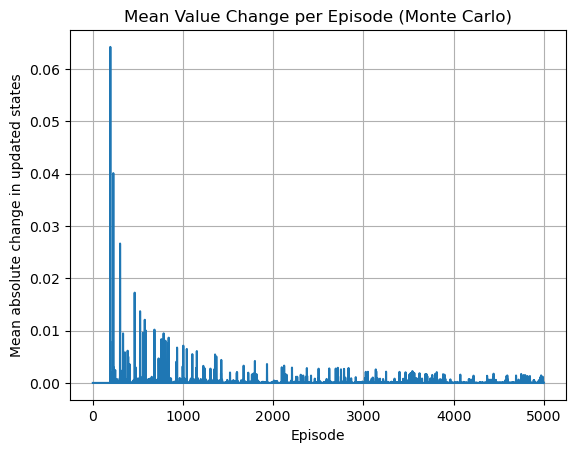

In [2]:
# Plot value function change per episode
plt.plot(change_episodes, mean_value_changes)
plt.xlabel("Episode")
plt.ylabel("Mean absolute change in updated states")
plt.title("Mean Value Change per Episode (Monte Carlo)")
plt.grid(True)
plt.show()
